In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [80]:
# prompt: import a csv file

import pandas as pd
df = pd.read_csv("/content/lagos_rent.csv")


In [81]:
df.head()

,Unnamed: 0,Title,Price,PID,Location,Bedroom,Bathroom,Toilet,Status,Date Added,Date Updated
0,0,4 bedroom House for rent Ikota Lekki Lagos,"5,500,000/year",7KZAE,Ikota Lekki Lagos,4,5,5,"Furnished ,Serviced ,Newly Built",26 Feb 2024,02 May 2024
1,1,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",1LCWR,Ikate Lekki Lagos,2,3,3,"Furnished ,Serviced ,Newly Built",02 Apr 2024,02 May 2024
2,2,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",4LBHX,Ikate Lekki Lagos,2,3,3,"Furnished ,Serviced ,Newly Built",18 Mar 2024,02 May 2024
3,3,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",4LENM,Ikate Lekki Lagos,2,2,2,"Serviced ,Newly Built",17 Apr 2024,02 May 2024
4,4,2 bedroom Flat / Apartment for rent Aguda Suru...,"2,500,000/year",8LCCU,Aguda Surulere Lagos,2,0,0,NaN,25 Mar 2024,02 May 2024


In [82]:
df.Location

0            Ikota Lekki Lagos
1            Ikate Lekki Lagos
2            Ikate Lekki Lagos
3            Ikate Lekki Lagos
4         Aguda Surulere Lagos
                 ...          
12265      Chevron Lekki Lagos
12266    Igbo Efon Lekki Lagos
12267     Sangotedo Ajah Lagos
12268       Awoyaya Ajah Lagos
12269      Olokonla Ajah Lagos
Name: Location, Length: 12270, dtype: object

In [83]:
df = df.drop(columns=['Unnamed: 0'])

In [84]:
df.head()

,Title,Price,PID,Location,Bedroom,Bathroom,Toilet,Status,Date Added,Date Updated
0,4 bedroom House for rent Ikota Lekki Lagos,"5,500,000/year",7KZAE,Ikota Lekki Lagos,4,5,5,"Furnished ,Serviced ,Newly Built",26 Feb 2024,02 May 2024
1,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",1LCWR,Ikate Lekki Lagos,2,3,3,"Furnished ,Serviced ,Newly Built",02 Apr 2024,02 May 2024
2,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",4LBHX,Ikate Lekki Lagos,2,3,3,"Furnished ,Serviced ,Newly Built",18 Mar 2024,02 May 2024
3,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",4LENM,Ikate Lekki Lagos,2,2,2,"Serviced ,Newly Built",17 Apr 2024,02 May 2024
4,2 bedroom Flat / Apartment for rent Aguda Suru...,"2,500,000/year",8LCCU,Aguda Surulere Lagos,2,0,0,NaN,25 Mar 2024,02 May 2024


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12270 entries, 0 to 12269
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         12270 non-null  object
 1   Price         12270 non-null  object
 2   PID           12270 non-null  object
 3   Location      12270 non-null  object
 4   Bedroom       12270 non-null  object
 5   Bathroom      12270 non-null  object
 6   Toilet        12270 non-null  object
 7   Status        5354 non-null   object
 8   Date Added    12100 non-null  object
 9   Date Updated  12100 non-null  object
dtypes: object(10)
memory usage: 958.7+ KB


In [86]:
df.Price.unique().tolist()

[' 5,500,000/year ',
 ' 6,000,000/year ',
 ' 2,500,000/year ',
 ' 23,000,000/year ',
 ' 7,000,000/year ',
 ' 60,000,000/year ',
 ' 15,000,000/year ',
 ' 5,000,000/year ',
 ' 16,000,000/year ',
 ' 13,000,000/year ',
 ' 1,200,000/year ',
 ' 1,000,000/year ',
 ' 12,000,000/year ',
 ' 25,000/year ',
 ' 8,000,000/year ',
 ' 1,300,000/year ',
 ' 4,000,000/year ',
 ' 25,000,000/year ',
 ' 18,000,000/year ',
 ' 21,100,000 ',
 ' 20,000,000/year ',
 ' 40,000,000/year ',
 ' 9,500,000/year ',
 ' 7,500,000/year ',
 ' 2,000,000/year ',
 ' 3,000,000/year ',
 ' 20,000,000 ',
 ' 9,000,000/year ',
 ' 7,000,000 ',
 ' 1,800,000/year ',
 ' 4,500,000/year ',
 ' 10,000,000/year ',
 ' 50,000/year ',
 ' 21,000,000/year ',
 ' 8,500,000/year ',
 ' 3,500,000/year ',
 ' 2,200,000/year ',
 ' 900,000/year ',
 ' 500,000/year ',
 ' 700,000/year ',
 ' 850,000/year ',
 ' 800,000/year ',
 ' 6,500,000/year ',
 ' 35,000,000/year ',
 ' 15,000/year ',
 ' 1,500,000/year ',
 ' 14,000,000/year ',
 ' 600,000/year ',
 ' 10,500,00

In [87]:
rows_with_sqm = df[df['Price'].str.contains("/sqm")]

In [88]:
len(rows_with_sqm)

246

In [89]:
rows_with_sqm.head()

,Title,Price,PID,Location,Bedroom,Bathroom,Toilet,Status,Date Added,Date Updated
214,Commercial Property for rent Ahmadu Bello Way...,"90,000/sqm",6LCCF,Ahmadu Bello Way Victoria Island Lagos,0,0,0,Serviced,25 Mar 2024,01 May 2024
349,Flat / Apartment for rent Lekki Phase 1 Lekki ...,"110,000/sqm",4KMFK,Lekki Phase 1 Lekki Lagos,0,0,4,Newly Built,07 Nov 2023,01 May 2024
428,Commercial Property for rent Amuwo Industrial ...,"25,000,000/sqm",9KUYR,Amuwo Industrial Layout Amuwo Odofin Lagos,0,0,0,NaN,17 Jan 2024,02 May 2024
499,Commercial Property for rent Abule Oshun Ojo L...,"30,000/sqm",6KVBH,Abule Oshun Ojo Lagos,0,0,0,NaN,17 Jan 2024,02 May 2024
500,Commercial Property for rent Abule Oshun Ojo L...,"30,000/sqm",6KVBH,Abule Oshun Ojo Lagos,0,0,0,NaN,17 Jan 2024,02 May 2024


In [90]:
# Remove rows containing "/sqm"
df = df[~df['Price'].str.contains("/sqm")]

In [91]:
df

,Title,Price,PID,Location,Bedroom,Bathroom,Toilet,Status,Date Added,Date Updated
0,4 bedroom House for rent Ikota Lekki Lagos,"5,500,000/year",7KZAE,Ikota Lekki Lagos,4,5,5,"Furnished ,Serviced ,Newly Built",26 Feb 2024,02 May 2024
1,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",1LCWR,Ikate Lekki Lagos,2,3,3,"Furnished ,Serviced ,Newly Built",02 Apr 2024,02 May 2024
2,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",4LBHX,Ikate Lekki Lagos,2,3,3,"Furnished ,Serviced ,Newly Built",18 Mar 2024,02 May 2024
3,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",4LENM,Ikate Lekki Lagos,2,2,2,"Serviced ,Newly Built",17 Apr 2024,02 May 2024
4,2 bedroom Flat / Apartment for rent Aguda Suru...,"2,500,000/year",8LCCU,Aguda Surulere Lagos,2,0,0,NaN,25 Mar 2024,02 May 2024
...,...,...,...,...,...,...,...,...,...,...
12265,2 bedroom Flat / Apartment for rent chevron Le...,"3,500,000/year",6KSQV,Chevron Lekki Lagos,2,2,1,NaN,21 Dec 2023,10 Jan 2024
12266,1 bedroom Flat / Apartment for rent Igbo-efon ...,"3,000,000/year",0KTMN,Igbo Efon Lekki Lagos,1,1,2,NaN,03 Jan 2024,10 Jan 2024
12267,2 bedroom Flat / Apartment for rent Sangotedo ...,"1,800,000/year",8KTDB,Sangotedo Ajah Lagos,2,2,3,NaN,28 Dec 2023,10 Jan 2024
12268,3 bedroom Flat / Apartment for rent Awoyaya Aj...,"1,000,000/year",8KSRM,Awoyaya Ajah Lagos,3,3,4,NaN,21 Dec 2023,10 Jan 2024


In [92]:
# Process rows with "/year"
df_year = df[df['Price'].str.contains("/year")]
df_year['Price_new'] = df_year['Price'].str.replace("/year", "").str.replace(",", "").astype(int)

In [93]:
df_year.head()

,Title,Price,PID,Location,Bedroom,Bathroom,Toilet,Status,Date Added,Date Updated,Price_new
0,4 bedroom House for rent Ikota Lekki Lagos,"5,500,000/year",7KZAE,Ikota Lekki Lagos,4,5,5,"Furnished ,Serviced ,Newly Built",26 Feb 2024,02 May 2024,5500000
1,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",1LCWR,Ikate Lekki Lagos,2,3,3,"Furnished ,Serviced ,Newly Built",02 Apr 2024,02 May 2024,6000000
2,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",4LBHX,Ikate Lekki Lagos,2,3,3,"Furnished ,Serviced ,Newly Built",18 Mar 2024,02 May 2024,6000000
3,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",4LENM,Ikate Lekki Lagos,2,2,2,"Serviced ,Newly Built",17 Apr 2024,02 May 2024,6000000
4,2 bedroom Flat / Apartment for rent Aguda Suru...,"2,500,000/year",8LCCU,Aguda Surulere Lagos,2,0,0,NaN,25 Mar 2024,02 May 2024,2500000


In [94]:
# Process rows with "/month"
df_month = df[df['Price'].str.contains("/month")]
df_month['Price_new'] = (df_month['Price']
                     .str.replace("/month", "")
                     .str.replace(",", "")
                     .astype(int) * 12)

In [95]:
# Concatenate the processed DataFrames
df = pd.concat([df_year, df_month])

In [96]:
df.head()

,Title,Price,PID,Location,Bedroom,Bathroom,Toilet,Status,Date Added,Date Updated,Price_new
0,4 bedroom House for rent Ikota Lekki Lagos,"5,500,000/year",7KZAE,Ikota Lekki Lagos,4,5,5,"Furnished ,Serviced ,Newly Built",26 Feb 2024,02 May 2024,5500000
1,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",1LCWR,Ikate Lekki Lagos,2,3,3,"Furnished ,Serviced ,Newly Built",02 Apr 2024,02 May 2024,6000000
2,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",4LBHX,Ikate Lekki Lagos,2,3,3,"Furnished ,Serviced ,Newly Built",18 Mar 2024,02 May 2024,6000000
3,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",4LENM,Ikate Lekki Lagos,2,2,2,"Serviced ,Newly Built",17 Apr 2024,02 May 2024,6000000
4,2 bedroom Flat / Apartment for rent Aguda Suru...,"2,500,000/year",8LCCU,Aguda Surulere Lagos,2,0,0,NaN,25 Mar 2024,02 May 2024,2500000


In [97]:
df.Status.unique().tolist()

['Furnished ,Serviced ,Newly Built',
 'Serviced ,Newly Built',
 nan,
 'Newly Built',
 'Serviced',
 'Furnished ,Newly Built',
 'Furnished',
 'Furnished ,Serviced']

In [98]:
# Define a function to extract status values
def extract_status(status, keyword):
    if isinstance(status, str) and keyword in status:
        return 1
    return 0

In [99]:
# Extract values for each keyword
df['Newly Built'] = df['Status'].apply(lambda x: extract_status(x, 'Newly Built'))
df['Serviced'] = df['Status'].apply(lambda x: extract_status(x, 'Serviced'))
df['Furnished'] = df['Status'].apply(lambda x: extract_status(x, 'Furnished'))

In [100]:
# Drop the original 'Status' column
df.drop(columns=['Status'], inplace=True)

In [101]:
df.head()

,Title,Price,PID,Location,Bedroom,Bathroom,Toilet,Date Added,Date Updated,Price_new,Newly Built,Serviced,Furnished
0,4 bedroom House for rent Ikota Lekki Lagos,"5,500,000/year",7KZAE,Ikota Lekki Lagos,4,5,5,26 Feb 2024,02 May 2024,5500000,1,1,1
1,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",1LCWR,Ikate Lekki Lagos,2,3,3,02 Apr 2024,02 May 2024,6000000,1,1,1
2,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",4LBHX,Ikate Lekki Lagos,2,3,3,18 Mar 2024,02 May 2024,6000000,1,1,1
3,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",4LENM,Ikate Lekki Lagos,2,2,2,17 Apr 2024,02 May 2024,6000000,1,1,0
4,2 bedroom Flat / Apartment for rent Aguda Suru...,"2,500,000/year",8LCCU,Aguda Surulere Lagos,2,0,0,25 Mar 2024,02 May 2024,2500000,0,0,0


In [102]:
# Remove ' Lagos' from the 'Location' column
df['Location'] = df['Location'].str.replace(' Lagos', '')

In [103]:
df.head()

,Title,Price,PID,Location,Bedroom,Bathroom,Toilet,Date Added,Date Updated,Price_new,Newly Built,Serviced,Furnished
0,4 bedroom House for rent Ikota Lekki Lagos,"5,500,000/year",7KZAE,Ikota Lekki,4,5,5,26 Feb 2024,02 May 2024,5500000,1,1,1
1,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",1LCWR,Ikate Lekki,2,3,3,02 Apr 2024,02 May 2024,6000000,1,1,1
2,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",4LBHX,Ikate Lekki,2,3,3,18 Mar 2024,02 May 2024,6000000,1,1,1
3,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",4LENM,Ikate Lekki,2,2,2,17 Apr 2024,02 May 2024,6000000,1,1,0
4,2 bedroom Flat / Apartment for rent Aguda Suru...,"2,500,000/year",8LCCU,Aguda Surulere,2,0,0,25 Mar 2024,02 May 2024,2500000,0,0,0


In [104]:
# Extract the city from the 'Location' column with exception for "Island" and "Egba"
def extract_city(location):
    words = location.split()
    if words[-1] in ['Island', 'Egba']:
        return ' '.join(words[-2:])
    else:
        return words[-1]

In [105]:
df['City'] = df['Location'].apply(extract_city)

In [106]:
df.head()

,Title,Price,PID,Location,Bedroom,Bathroom,Toilet,Date Added,Date Updated,Price_new,Newly Built,Serviced,Furnished,City
0,4 bedroom House for rent Ikota Lekki Lagos,"5,500,000/year",7KZAE,Ikota Lekki,4,5,5,26 Feb 2024,02 May 2024,5500000,1,1,1,Lekki
1,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",1LCWR,Ikate Lekki,2,3,3,02 Apr 2024,02 May 2024,6000000,1,1,1,Lekki
2,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",4LBHX,Ikate Lekki,2,3,3,18 Mar 2024,02 May 2024,6000000,1,1,1,Lekki
3,2 bedroom House for rent Ikate Lekki Lagos,"6,000,000/year",4LENM,Ikate Lekki,2,2,2,17 Apr 2024,02 May 2024,6000000,1,1,0,Lekki
4,2 bedroom Flat / Apartment for rent Aguda Suru...,"2,500,000/year",8LCCU,Aguda Surulere,2,0,0,25 Mar 2024,02 May 2024,2500000,0,0,0,Surulere


In [107]:
# Rearrange the columns
df = df.reindex(columns=['PID', 'Title', 'Location', 'City', 'Bedroom', 'Bathroom', 'Toilet',
                         'Newly Built', 'Furnished', 'Serviced', 'Date Added', 'Date Updated', 'Price', 'Price_new'])

In [108]:
df.head()

,PID,Title,Location,City,Bedroom,Bathroom,Toilet,Newly Built,Furnished,Serviced,Date Added,Date Updated,Price,Price_new
0,7KZAE,4 bedroom House for rent Ikota Lekki Lagos,Ikota Lekki,Lekki,4,5,5,1,1,1,26 Feb 2024,02 May 2024,"5,500,000/year",5500000
1,1LCWR,2 bedroom House for rent Ikate Lekki Lagos,Ikate Lekki,Lekki,2,3,3,1,1,1,02 Apr 2024,02 May 2024,"6,000,000/year",6000000
2,4LBHX,2 bedroom House for rent Ikate Lekki Lagos,Ikate Lekki,Lekki,2,3,3,1,1,1,18 Mar 2024,02 May 2024,"6,000,000/year",6000000
3,4LENM,2 bedroom House for rent Ikate Lekki Lagos,Ikate Lekki,Lekki,2,2,2,1,0,1,17 Apr 2024,02 May 2024,"6,000,000/year",6000000
4,8LCCU,2 bedroom Flat / Apartment for rent Aguda Suru...,Aguda Surulere,Surulere,2,0,0,0,0,0,25 Mar 2024,02 May 2024,"2,500,000/year",2500000


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11746 entries, 0 to 11850
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PID           11746 non-null  object
 1   Title         11746 non-null  object
 2   Location      11746 non-null  object
 3   City          11746 non-null  object
 4   Bedroom       11746 non-null  object
 5   Bathroom      11746 non-null  object
 6   Toilet        11746 non-null  object
 7   Newly Built   11746 non-null  int64 
 8   Furnished     11746 non-null  int64 
 9   Serviced      11746 non-null  int64 
 10  Date Added    11608 non-null  object
 11  Date Updated  11608 non-null  object
 12  Price         11746 non-null  object
 13  Price_new     11746 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.6+ MB


In [110]:
df.Bedroom.unique().tolist()

['4', '2', '5', '3', '1', '0', ' ', '6', '7', '8', '9']

In [111]:
# Replace empty strings with a default value
df['Bedroom'] = df['Bedroom'].replace(' ', '0')
df['Bathroom'] = df['Bathroom'].replace(' ', '0')
df['Toilet'] = df['Toilet'].replace(' ', '0')

In [112]:
# Convert columns to int
df['Bedroom'] = df['Bedroom'].astype(int)
df['Bathroom'] = df['Bathroom'].astype(int)
df['Toilet'] = df['Toilet'].astype(int)

In [113]:
# Drop the 'Date Added' and 'Date Updated' columns
df = df.drop(columns=['Date Added', 'Date Updated'])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11746 entries, 0 to 11850
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PID          11746 non-null  object
 1   Title        11746 non-null  object
 2   Location     11746 non-null  object
 3   City         11746 non-null  object
 4   Bedroom      11746 non-null  int64 
 5   Bathroom     11746 non-null  int64 
 6   Toilet       11746 non-null  int64 
 7   Newly Built  11746 non-null  int64 
 8   Furnished    11746 non-null  int64 
 9   Serviced     11746 non-null  int64 
 10  Price        11746 non-null  object
 11  Price_new    11746 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 1.4+ MB


In [115]:
df = df.drop(columns=['PID'])

In [116]:
df.head()

,Title,Location,City,Bedroom,Bathroom,Toilet,Newly Built,Furnished,Serviced,Price,Price_new
0,4 bedroom House for rent Ikota Lekki Lagos,Ikota Lekki,Lekki,4,5,5,1,1,1,"5,500,000/year",5500000
1,2 bedroom House for rent Ikate Lekki Lagos,Ikate Lekki,Lekki,2,3,3,1,1,1,"6,000,000/year",6000000
2,2 bedroom House for rent Ikate Lekki Lagos,Ikate Lekki,Lekki,2,3,3,1,1,1,"6,000,000/year",6000000
3,2 bedroom House for rent Ikate Lekki Lagos,Ikate Lekki,Lekki,2,2,2,1,0,1,"6,000,000/year",6000000
4,2 bedroom Flat / Apartment for rent Aguda Suru...,Aguda Surulere,Surulere,2,0,0,0,0,0,"2,500,000/year",2500000


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11746 entries, 0 to 11850
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        11746 non-null  object
 1   Location     11746 non-null  object
 2   City         11746 non-null  object
 3   Bedroom      11746 non-null  int64 
 4   Bathroom     11746 non-null  int64 
 5   Toilet       11746 non-null  int64 
 6   Newly Built  11746 non-null  int64 
 7   Furnished    11746 non-null  int64 
 8   Serviced     11746 non-null  int64 
 9   Price        11746 non-null  object
 10  Price_new    11746 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.3+ MB


In [118]:
df.describe()

,Bedroom,Bathroom,Toilet,Newly Built,Furnished,Serviced,Price_new
count,11746.000000,11746.000000,11746.000000,11746.000000,11746.000000,11746.000000,1.174600e+04
mean,2.063511,2.027669,2.383535,0.275924,0.104461,0.257620,8.054057e+06
std,1.652291,1.811181,2.054539,0.446998,0.305871,0.437342,3.902495e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000e+06
50%,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,3.500000e+06
75%,3.000000,4.000000,4.000000,1.000000,0.000000,1.000000,8.000000e+06
max,9.000000,9.000000,9.000000,1.000000,1.000000,1.000000,2.800000e+09


In [119]:
df.isnull().sum()

Title          0
Location       0
City           0
Bedroom        0
Bathroom       0
Toilet         0
Newly Built    0
Furnished      0
Serviced       0
Price          0
Price_new      0
dtype: int64

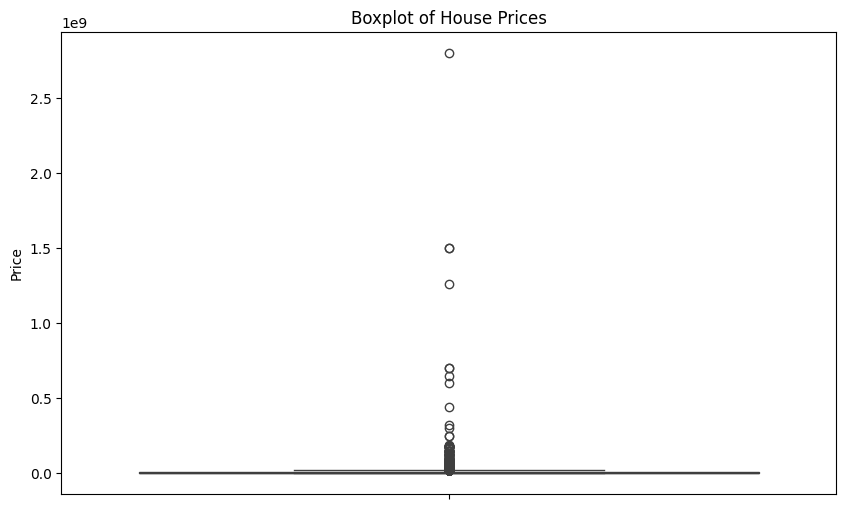

In [120]:
# Create a boxplot of house prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Price_new')
plt.title('Boxplot of House Prices')
plt.ylabel('Price')
plt.show()

In [121]:
# Calculate the first and third quartiles and interquartile range
Q1 = df['Price_new'].quantile(0.1)
Q3 = df['Price_new'].quantile(0.9)
IQR = Q3 - Q1

In [122]:
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [123]:
# Identify outliers
outliers = df[(df['Price_new'] < lower_bound) | (df['Price_new'] > upper_bound)]

In [124]:
outliers.sort_values(by='Price_new', ascending=False).head()

,Title,Location,City,Bedroom,Bathroom,Toilet,Newly Built,Furnished,Serviced,Price,Price_new
2234,2 bedroom Flat / Apartment for rent Ajah Lagos,Ajah,Ajah,2,0,0,0,0,0,"2,800,000,000/year",2800000000
6547,"Land for rent Patrick Harbour, Ikoyi Lagos","Patrick Harbour, Ikoyi",Ikoyi,0,0,0,0,0,0,"1,500,000,000/year",1500000000
11413,Commercial Property for rent Ibafon Apapa Lagos,Ibafon Apapa,Apapa,0,0,0,0,0,0,"1,500,000,000/year",1500000000
11414,Commercial Property for rent Dock Yard Apapa L...,Dock Yard Apapa,Apapa,0,0,0,0,0,0,"1,260,000,000/year",1260000000
6512,1 bedroom Flat / Apartment for rent VGC Lekki...,Vgc Lekki,Lekki,1,1,1,0,0,0,"700,000,000/year",700000000


In [125]:
low, high = df["Price_new"].quantile([0.1,0.9])
mask = df["Price_new"].between(low, high)
df1 = df[mask]

In [126]:
df1.shape

(9631, 11)

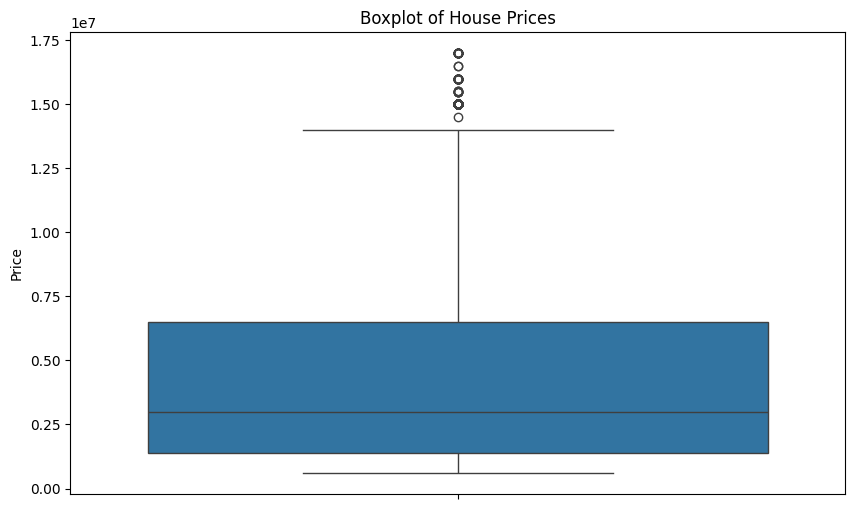

In [127]:
# Create a boxplot of house prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, y='Price_new', orient="h")
plt.title('Boxplot of House Prices')
plt.ylabel('Price')
plt.show()

In [128]:
# Sort outliers by price in descending order
sorted_outliers = outliers.sort_values(by='Price_new', ascending=False)

In [129]:
sorted_outliers.head(10)

,Title,Location,City,Bedroom,Bathroom,Toilet,Newly Built,Furnished,Serviced,Price,Price_new
2234,2 bedroom Flat / Apartment for rent Ajah Lagos,Ajah,Ajah,2,0,0,0,0,0,"2,800,000,000/year",2800000000
6547,"Land for rent Patrick Harbour, Ikoyi Lagos","Patrick Harbour, Ikoyi",Ikoyi,0,0,0,0,0,0,"1,500,000,000/year",1500000000
11413,Commercial Property for rent Ibafon Apapa Lagos,Ibafon Apapa,Apapa,0,0,0,0,0,0,"1,500,000,000/year",1500000000
11414,Commercial Property for rent Dock Yard Apapa L...,Dock Yard Apapa,Apapa,0,0,0,0,0,0,"1,260,000,000/year",1260000000
6512,1 bedroom Flat / Apartment for rent VGC Lekki...,Vgc Lekki,Lekki,1,1,1,0,0,0,"700,000,000/year",700000000
7026,1 bedroom Flat / Apartment for rent Greenville...,Greenville Badore Ajah,Ajah,1,1,2,0,0,0,"700,000,000/year",700000000
12160,Flat / Apartment for rent Off Bailey Street Ab...,Off Bailey Street Abule Ijesha Yaba,Yaba,0,0,0,1,1,1,"650,000,000/year",650000000
6880,1 bedroom Flat / Apartment for rent Greenville...,Greenville Estate Badore Ajah,Ajah,1,1,1,0,0,0,"600,000,000/year",600000000
8736,Land for rent Mobolaji Bank Anthony Way Ikeja ...,Mobolaji Bank Anthony Way Ikeja,Ikeja,0,0,0,0,0,0,"440,000,000/year",440000000
11771,4 bedroom House for rent Awuse Estate Opebi Ik...,Awuse Estate Opebi Ikeja Opebi Ikeja,Ikeja,4,4,5,0,0,0,"320,000,000/year",320000000


In [130]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df1[df1.duplicated()]

In [131]:
duplicate_rows

,Title,Location,City,Bedroom,Bathroom,Toilet,Newly Built,Furnished,Serviced,Price,Price_new
2,2 bedroom House for rent Ikate Lekki Lagos,Ikate Lekki,Lekki,2,3,3,1,1,1,"6,000,000/year",6000000
21,4 bedroom House for rent Ikota Lekki Lagos,Ikota Lekki,Lekki,4,5,5,1,1,1,"5,500,000/year",5500000
27,2 bedroom House for rent Ikate Lekki Lagos,Ikate Lekki,Lekki,2,3,3,1,1,1,"6,000,000/year",6000000
43,4 bedroom House for rent Ikota Lekki Lagos,Ikota Lekki,Lekki,4,5,5,1,1,1,"5,000,000/year",5000000
60,4 bedroom House for rent Ikota Lekki Lagos,Ikota Lekki,Lekki,4,5,5,1,1,1,"5,000,000/year",5000000
...,...,...,...,...,...,...,...,...,...,...,...
12247,2 bedroom Flat / Apartment for rent Lekki Phas...,Lekki Phase 1 Lekki,Lekki,2,2,3,0,0,0,"4,000,000/year",4000000
12267,2 bedroom Flat / Apartment for rent Sangotedo ...,Sangotedo Ajah,Ajah,2,2,3,0,0,0,"1,800,000/year",1800000
3701,Flat / Apartment for rent Fadeyi Jibowu Yaba L...,Fadeyi Jibowu Yaba,Yaba,0,0,0,0,0,0,"50,000/month",600000
9834,Flat / Apartment for rent Fadeyi Jibowu Yaba L...,Fadeyi Jibowu Yaba,Yaba,0,1,1,1,0,0,"50,000/month",600000


In [132]:
# Remove duplicate rows from the DataFrame
df1 = df1.drop_duplicates()

In [133]:
# Print the updated DataFrame shape to see the number of rows after removing duplicates
print("DataFrame shape after removing duplicates:", df1.shape)

DataFrame shape after removing duplicates: (8295, 11)


In [134]:
# Sort the DataFrame by price in ascending order
top_min_price_houses = df1.sort_values(by='Price_new', ascending=True).head(30)

In [135]:
top_min_price_houses

,Title,Location,City,Bedroom,Bathroom,Toilet,Newly Built,Furnished,Serviced,Price,Price_new
9875,Flat / Apartment for rent Waec Jibowu Yaba Lagos,Waec Jibowu Yaba,Yaba,0,1,1,1,0,0,"600,000/year",600000
2491,Flat / Apartment for rent Palmgroove Shomolu L...,Palmgroove Shomolu,Shomolu,0,1,1,0,0,0,"600,000/year",600000
3330,Commercial Property for rent Bajulaiye Fola Ag...,Bajulaiye Fola Agoro Yaba,Yaba,0,0,0,0,0,0,"600,000/year",600000
6775,Flat / Apartment for rent Palmgroove Shomolu L...,Palmgroove Shomolu,Shomolu,0,0,0,0,0,0,"600,000/year",600000
6517,Flat / Apartment for rent Abule-Ijesha Yaba L...,Abule Ijesha Yaba,Yaba,0,0,0,0,0,0,"600,000/year",600000
3325,Flat / Apartment for rent Onipanu Onipanu Shom...,Onipanu Onipanu Shomolu,Shomolu,0,0,0,1,0,0,"600,000/year",600000
6840,Flat / Apartment for rent Pedro Phase 1 Gbagad...,Pedro Phase 1 Gbagada,Gbagada,0,1,1,1,1,1,"600,000/year",600000
2512,Flat / Apartment for rent Marshy Hills Estate ...,Marshy Hills Estate (akins) Ado Ajah,Ajah,0,0,0,0,0,0,"600,000/year",600000
6839,1 bedroom Flat / Apartment for rent Greenville...,Greenville Estate Badore Ajah,Ajah,1,1,1,0,0,0,"600,000/year",600000
3311,Flat / Apartment for rent Pedro Palmgroove Sho...,Pedro Palmgroove Shomolu,Shomolu,0,0,0,1,0,0,"600,000/year",600000


In [136]:
# Count the number of houses per city
houses_per_city = df1['City'].value_counts()

# Print the number of houses per city
print("Number of houses per city:")
houses_per_city

Number of houses per city:


City
Lekki              3259
Ajah               1167
Yaba                476
Ikoyi               390
Ikeja               375
Victoria Island     338
Surulere            316
Ojodu               257
Ogba                207
Gbagada             194
Shomolu             187
Ikosi               141
Ipaja               132
Okota               125
Isolo               105
Ogudu                92
Abule Egba           71
Alimosho             68
Odofin               62
Maryland             56
Igando               43
Ilupeju              36
Ikorodu              33
Sangotedo            31
Agege                31
Oshodi               28
Idimu                11
Ojota                10
Onikan Island         9
Ketu                  9
Bariga                8
Iju                   6
Apapa                 5
Marina Island         4
Mushin                3
Ejigbo                2
Badagry               2
Ojo                   2
Tbs, Island           1
Orile                 1
C.m.s Island          1
Island Isla

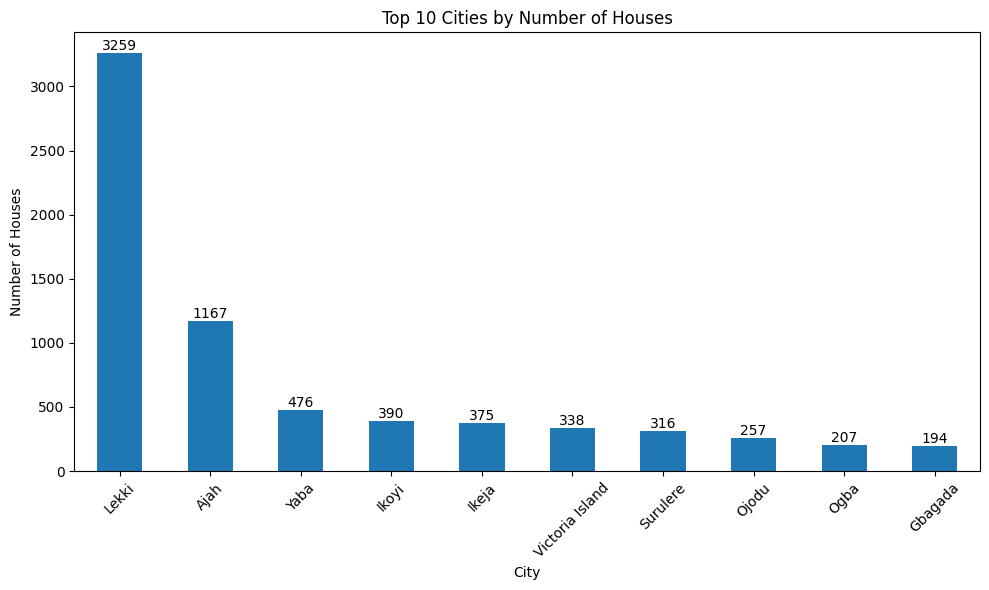

In [137]:
# Selecting the top 10 cities
top_10_cities = houses_per_city.head(10)

# Plotting the bar chart for top 10 cities
plt.figure(figsize=(10, 6))
top_10_cities.plot(kind='bar')
plt.title('Top 10 Cities by Number of Houses')
plt.xlabel('City')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding numbers on each bar
for index, value in enumerate(top_10_cities):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [138]:
df1.head()

,Title,Location,City,Bedroom,Bathroom,Toilet,Newly Built,Furnished,Serviced,Price,Price_new
0,4 bedroom House for rent Ikota Lekki Lagos,Ikota Lekki,Lekki,4,5,5,1,1,1,"5,500,000/year",5500000
1,2 bedroom House for rent Ikate Lekki Lagos,Ikate Lekki,Lekki,2,3,3,1,1,1,"6,000,000/year",6000000
3,2 bedroom House for rent Ikate Lekki Lagos,Ikate Lekki,Lekki,2,2,2,1,0,1,"6,000,000/year",6000000
4,2 bedroom Flat / Apartment for rent Aguda Suru...,Aguda Surulere,Surulere,2,0,0,0,0,0,"2,500,000/year",2500000
6,4 bedroom House for rent Off Harris Drive VGC ...,Off Harris Drive Vgc Lekki,Lekki,4,5,5,1,0,0,"6,000,000/year",6000000


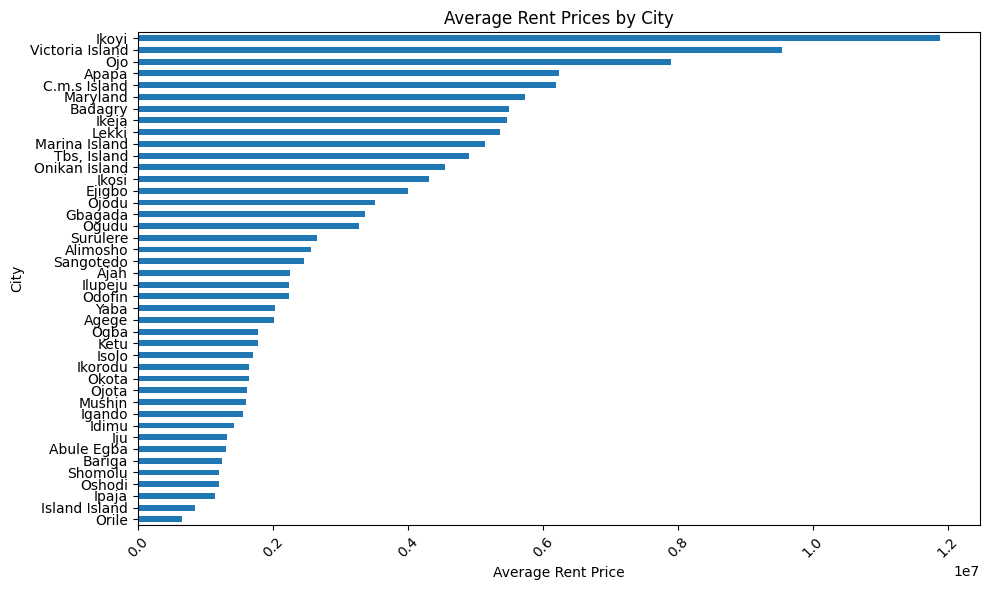

In [139]:
# Calculate average rent prices by city
average_prices = df1.groupby('City')['Price_new'].mean().sort_values()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
average_prices.plot(kind='barh')
plt.title('Average Rent Prices by City')
plt.xlabel('Average Rent Price')
plt.ylabel('City')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

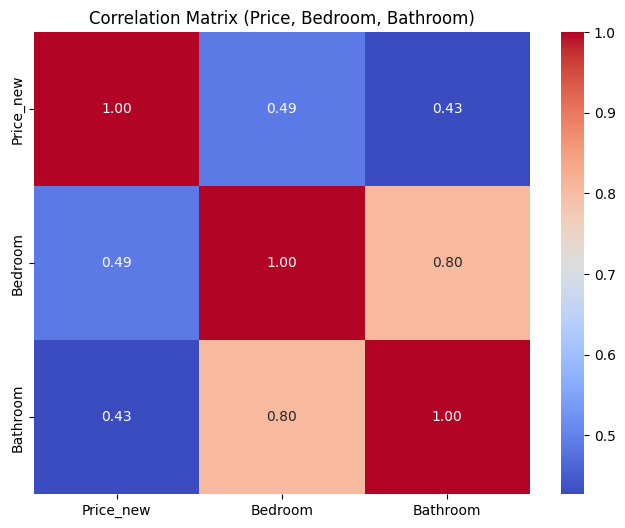

In [140]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = df1[['Price_new', 'Bedroom', 'Bathroom']].corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Price, Bedroom, Bathroom)')
plt.show()


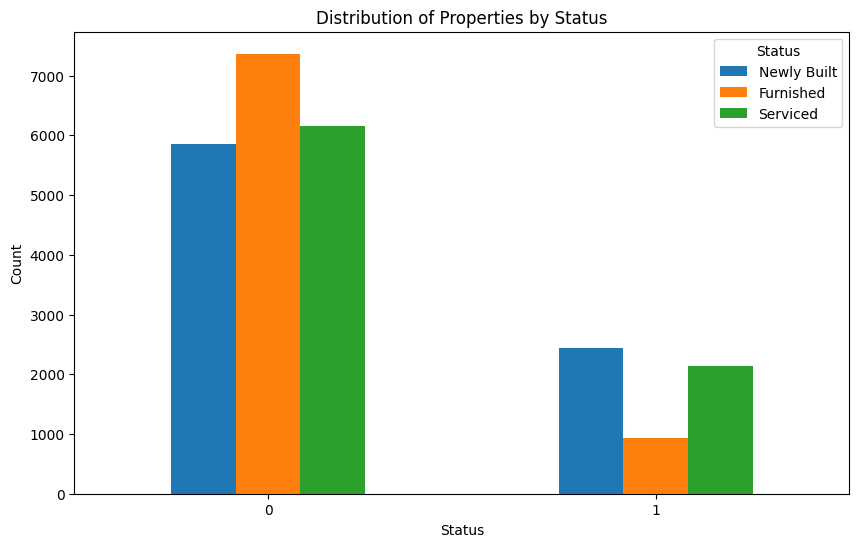

In [141]:
import matplotlib.pyplot as plt

# Count the number of properties based on their status
status_counts = df1[['Newly Built', 'Furnished', 'Serviced']].apply(pd.Series.value_counts)

# Plot the grouped bar chart
status_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Properties by Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.show()

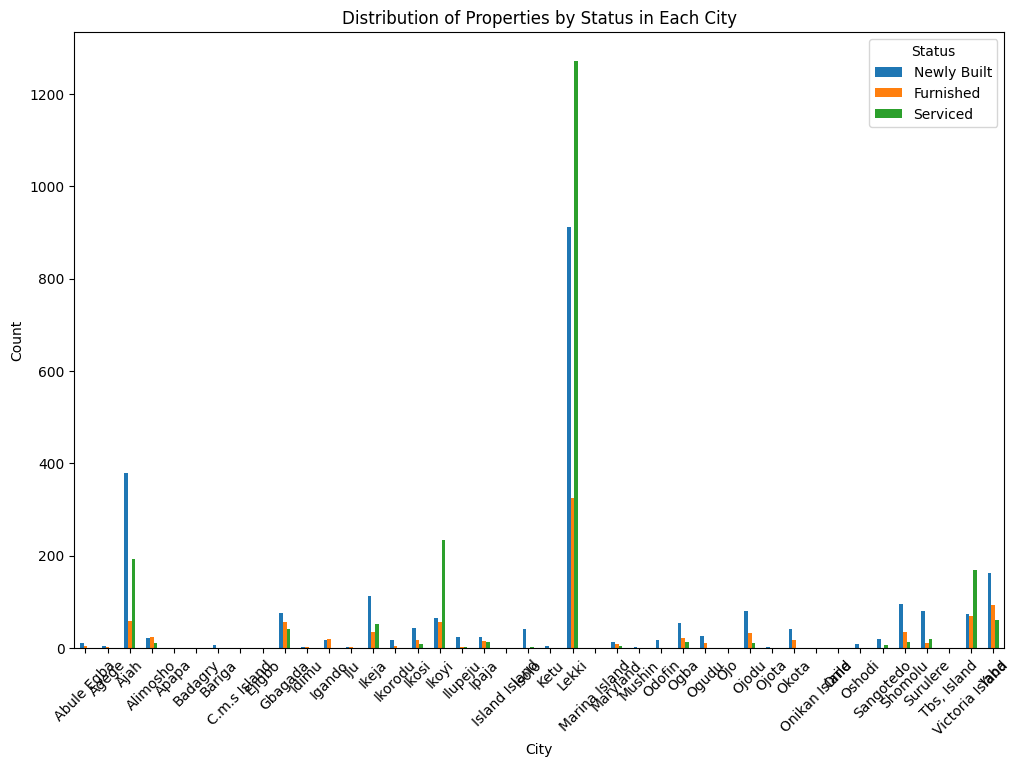

In [142]:
import matplotlib.pyplot as plt

# Group the data by city and count the number of properties for each status
city_status_counts = df1.groupby('City')[['Newly Built', 'Furnished', 'Serviced']].sum()

# Plot the grouped bar chart
city_status_counts.plot(kind='bar', figsize=(12, 8))
plt.title('Distribution of Properties by Status in Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()

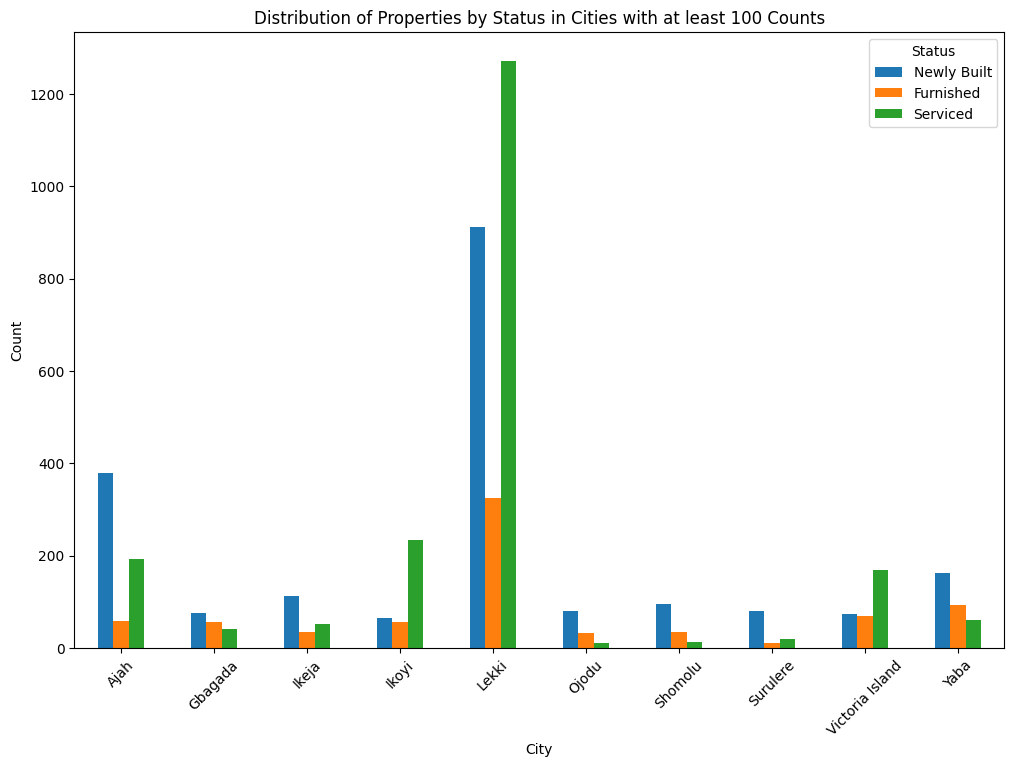

In [143]:
import matplotlib.pyplot as plt

# Filter cities with at least 100 counts
filtered_cities = city_status_counts[city_status_counts.sum(axis=1) >= 100]

# Plot the grouped bar chart
filtered_cities.plot(kind='bar', figsize=(12, 8))
plt.title('Distribution of Properties by Status in Cities with at least 100 Counts')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()

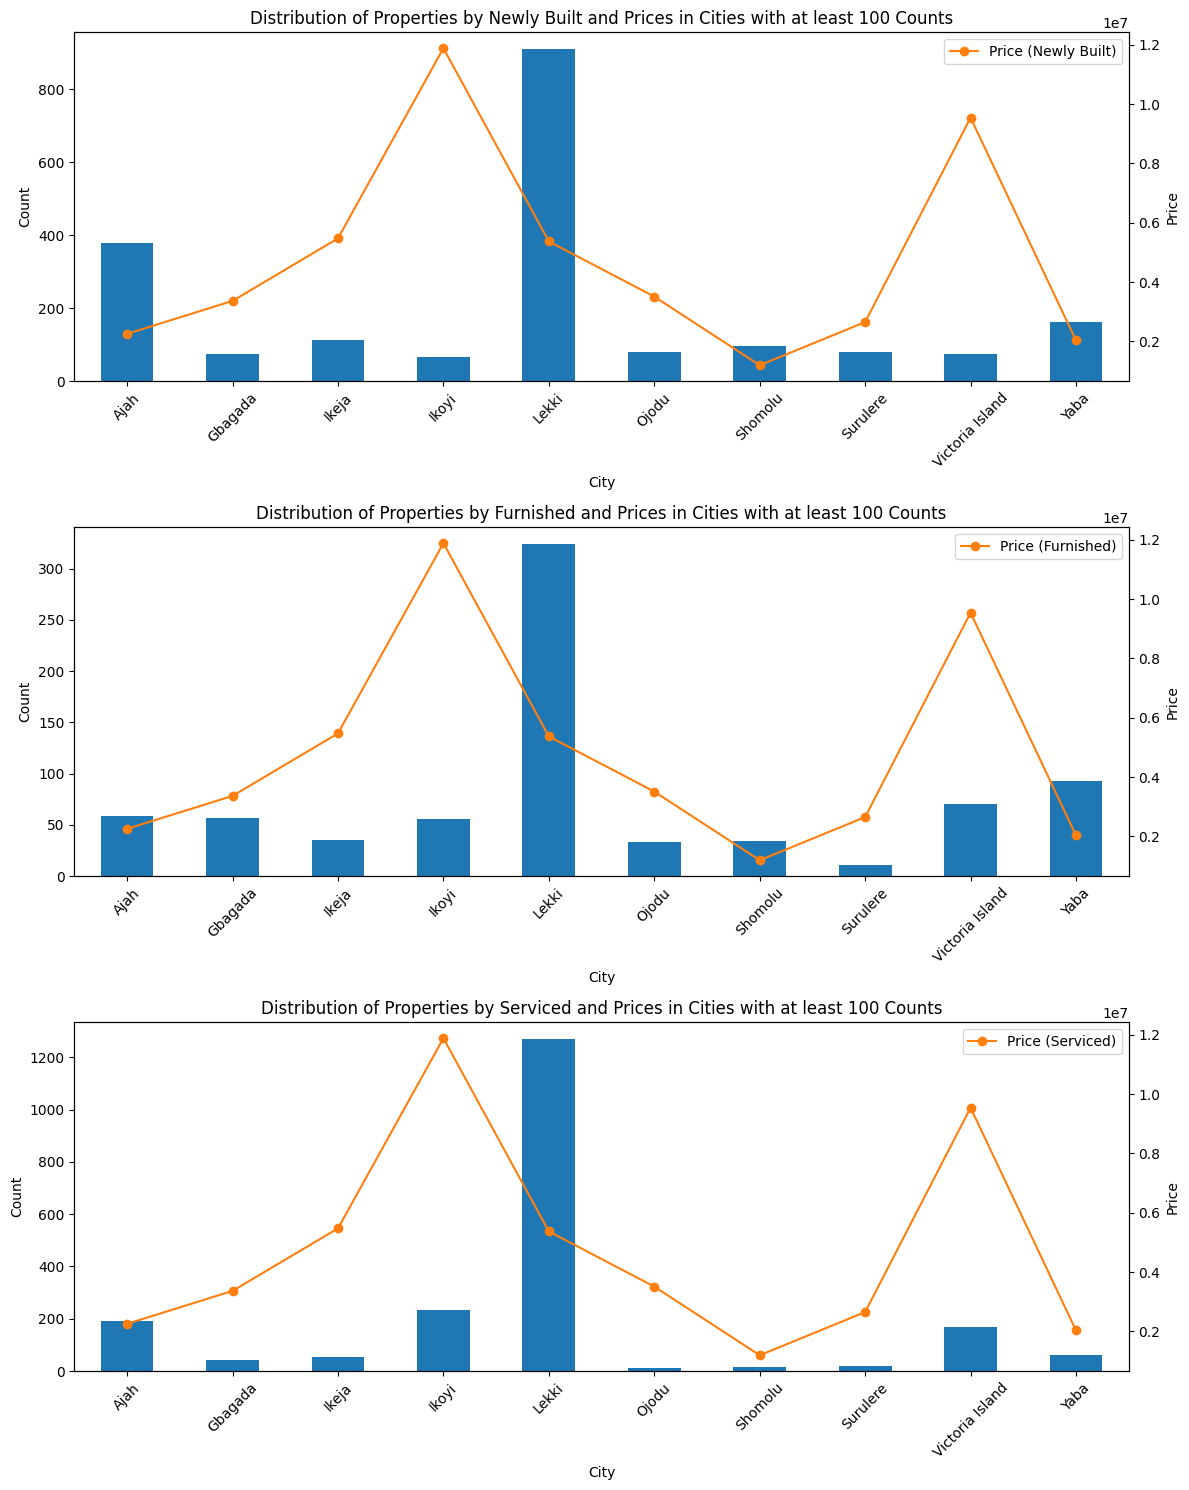

In [144]:
# Filter cities with at least 100 counts
filtered_cities = city_status_counts[city_status_counts.sum(axis=1) >= 100]

# Calculate average price for each city
filtered_cities['Average Price'] = df1.groupby('City')['Price_new'].mean()

# Plotting grouped bar chart for each status and prices
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))

for i, status in enumerate(['Newly Built', 'Furnished', 'Serviced']):
    ax = axes[i]
    ax.set_title(f'Distribution of Properties by {status} and Prices in Cities with at least 100 Counts')
    ax.set_xlabel('City')
    ax.set_ylabel('Count')

    # Plot bar chart for each status
    filtered_cities.plot(kind='bar', y=status, ax=ax, color='C0', legend=False)
    ax.tick_params(axis='x', rotation=45)
    ax2 = ax.twinx()

    # Plot line chart for prices
    filtered_cities.plot(kind='line', y='Average Price', ax=ax2, color='C1', marker='o', legend=False)
    ax2.set_ylabel('Price')
    ax2.legend([f'Price ({status})'], loc='upper right')

plt.tight_layout()
plt.show()

In [145]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8295 entries, 0 to 11850
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        8295 non-null   object
 1   Location     8295 non-null   object
 2   City         8295 non-null   object
 3   Bedroom      8295 non-null   int64 
 4   Bathroom     8295 non-null   int64 
 5   Toilet       8295 non-null   int64 
 6   Newly Built  8295 non-null   int64 
 7   Furnished    8295 non-null   int64 
 8   Serviced     8295 non-null   int64 
 9   Price        8295 non-null   object
 10  Price_new    8295 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 777.7+ KB


In [167]:
# Drop specified columns
df_ml = df1.drop(['Title', 'Price', 'City', 'Location'], axis=1)

In [168]:
df_ml

,Bedroom,Bathroom,Toilet,Newly Built,Furnished,Serviced,Price_new
0,4,5,5,1,1,1,5500000
1,2,3,3,1,1,1,6000000
3,2,2,2,1,0,1,6000000
4,2,0,0,0,0,0,2500000
6,4,5,5,1,0,0,6000000
...,...,...,...,...,...,...,...
9596,0,0,0,0,1,1,1800000
9666,0,1,1,1,0,0,600000
9921,0,1,1,0,0,0,600000
10531,0,0,0,1,0,1,720000


In [169]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Perform min-max scaling on the features
df_ml_scaled = scaler.fit_transform(df_ml)

# Convert the scaled array back to a DataFrame
df_ml_scaled = pd.DataFrame(df_ml_scaled, columns=df_ml.columns)

In [170]:
df_ml_scaled.head()

,Bedroom,Bathroom,Toilet,Newly Built,Furnished,Serviced,Price_new
0,0.444444,0.555556,0.555556,1.0,1.0,1.0,0.298780
1,0.222222,0.333333,0.333333,1.0,1.0,1.0,0.329268
2,0.222222,0.222222,0.222222,1.0,0.0,1.0,0.329268
3,0.222222,0.000000,0.000000,0.0,0.0,0.0,0.115854
4,0.444444,0.555556,0.555556,1.0,0.0,0.0,0.329268


In [171]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = df_ml_scaled.drop('Price_new', axis=1)  # Features (remove the target column)
y = df_ml_scaled['Price_new']  # Target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6636, 6)
X_test shape: (1659, 6)
y_train shape: (6636,)
y_test shape: (1659,)


In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Machine': SVR()
}

In [174]:
# Train and evaluate models
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{model_name}: Mean RMSE: {rmse_scores.mean()}, Std RMSE: {rmse_scores.std()}")

Linear Regression: Mean RMSE: 0.20164977441845927, Std RMSE: 0.006742188453988715
Decision Tree: Mean RMSE: 0.1899916580632022, Std RMSE: 0.0066674498524735585
Random Forest: Mean RMSE: 0.1879776278282778, Std RMSE: 0.0069064861498797335
Gradient Boosting: Mean RMSE: 0.18718164924906375, Std RMSE: 0.006239582070920605
Support Vector Machine: Mean RMSE: 0.1905026999393585, Std RMSE: 0.007013040635792759


In [175]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train and evaluate models
for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Print evaluation metrics
    print(f"{model_name}:")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print()

Linear Regression:
MAE: 0.148739809413654
RMSE: 0.20570684181837276
R^2: 0.26897069478079194

Decision Tree:
MAE: 0.1321341131971428
RMSE: 0.19127570867993418
R^2: 0.3679419697540466

Random Forest:
MAE: 0.13086326579927332
RMSE: 0.18853665423041938
R^2: 0.38591441116665326

Gradient Boosting:
MAE: 0.13187397473477758
RMSE: 0.1897290572279966
R^2: 0.37812226036603125

Support Vector Machine:
MAE: 0.13221826309843757
RMSE: 0.1936450618517636
R^2: 0.35218624224464967



In [176]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {'max_depth': [None, 5, 10, 15]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10, 15]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.01, 0.001]}
}

# Perform grid search with cross-validation for each model
best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_

# Evaluate best models
for model_name, model in best_models.items():
    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Print evaluation metrics
    print(f"{model_name}:")
    print(f"Best Parameters: {model.get_params()}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print()

Linear Regression:
Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
MAE: 0.148739809413654
RMSE: 0.20570684181837276
R^2: 0.26897069478079194

Decision Tree:
Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
MAE: 0.1337132680265403
RMSE: 0.19153553596388695
R^2: 0.3662236390368242

Random Forest:
Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
MAE: 0.13294327633340006
RMSE: 0.190487842